In [13]:
#import libraries

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
#load dataset

df= pd.read_csv("heart_disease_uci.csv")
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [3]:
#null check
print(df.isnull().sum())                 #checks null value
df= df.dropna()                          #removes all null value
print(df.isnull().sum())






id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64
id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [5]:
#Categorical Encoding

cp_mapping={"typical angina":0,"atypical angina":1,"non-anginal":2,"asymptomatic":3}
df['cp']=df['cp'].map(cp_mapping)

restecg_mapping= {'normal':0, 'lv hypertrophy':1, 'st-t abnormality': 2}
df['restecg']= df['restecg'].map(restecg_mapping)

sex_mapping= {"Male":0, "Female":1}
df['sex']= df['sex'].map(sex_mapping)

df['exang']= df['exang'].astype(int)
df['fbs']= df['fbs'].astype(int)

slope_mapping= {'upsloping':0, 'flat':1, 'downsloping':2}
df['slope']= df['slope'].map(slope_mapping)

thal_mapping= {'normal':0, 'fixed defect':1, 'reversable defect':2}
df['thal']= df['thal'].map(thal_mapping)
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,0,Cleveland,0,145.0,233.0,1,1,150.0,0,2.3,2,0.0,1,0
1,2,67,0,Cleveland,3,160.0,286.0,0,1,108.0,1,1.5,1,3.0,0,2
2,3,67,0,Cleveland,3,120.0,229.0,0,1,129.0,1,2.6,1,2.0,2,1
3,4,37,0,Cleveland,2,130.0,250.0,0,0,187.0,0,3.5,2,0.0,0,0
4,5,41,1,Cleveland,1,130.0,204.0,0,1,172.0,0,1.4,0,0.0,0,0


In [6]:
#drop unnecessary column

df= df.drop(columns=["id", "dataset"])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,0,0,145.0,233.0,1,1,150.0,0,2.3,2,0.0,1,0
1,67,0,3,160.0,286.0,0,1,108.0,1,1.5,1,3.0,0,2
2,67,0,3,120.0,229.0,0,1,129.0,1,2.6,1,2.0,2,1
3,37,0,2,130.0,250.0,0,0,187.0,0,3.5,2,0.0,0,0
4,41,1,1,130.0,204.0,0,1,172.0,0,1.4,0,0.0,0,0


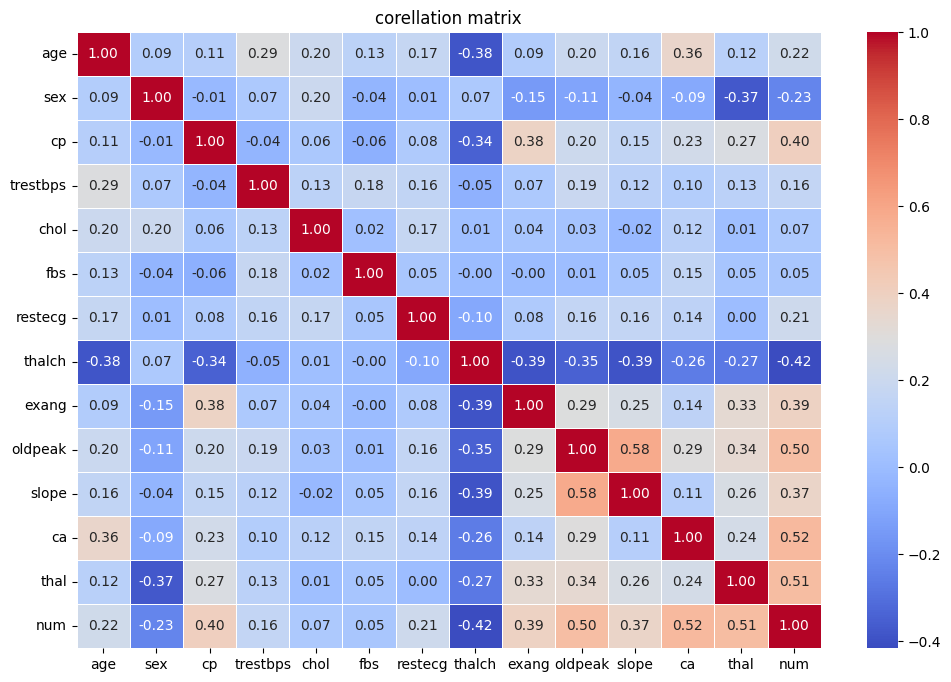

In [7]:
corellation_matrix=df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corellation_matrix,annot=True,cmap='coolwarm',fmt=".2f",linewidths=0.5)
plt.title("corellation matrix")
plt.show()

In [9]:
#feature selection

features= ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg','thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
x= df[features]

y= df['num']

In [10]:
#train test split of data
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.3, random_state= 42)


In [12]:
#print(x_train)

In [16]:
#scaling

scaler= StandardScaler()
x_train_scaled= scaler.fit_transform(x_train)
x_test_scale= scaler.fit_transform(x_test)

In [17]:
#Random Forest Classification

#train the model
rf_classifier= RandomForestClassifier(n_estimators=100, random_state= 42)

rf_classifier.fit(x_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [18]:
import joblib
joblib.dump(rf_classifier, "heart_disease.pkl")

['heart_disease.pkl']

In [21]:
#testing the model

model= joblib.load("heart_disease.pkl")
test_data= np.array([[65, 1, 3, 180, 290, 1, 2, 120, 1, 3.5, 2, 2, 2]])

prediction= model.predict(test_data)

print(prediction)
if prediction[0]==1:
    print("Type 1")
elif prediction[0]==2:
    print("Type 2")
elif prediction[0]== 3:
    print("Type 3")
    
    

[2]
Type 2


C:\Users\sthay\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


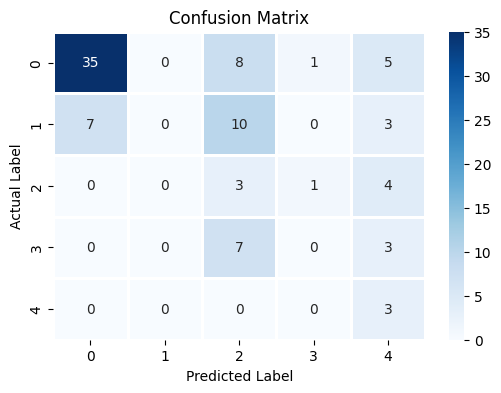

In [24]:
#confusion matrix
y_pred= model.predict(x_test)

cm= confusion_matrix(y_test, y_pred)
plt.figure(figsize= (6,4))
sns.heatmap(cm, annot= True, fmt= 'd', cmap= "Blues", linewidth= 1)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()